# Case Study 1 - Simulated Fibre Data

CRBS VectoRose Bootcamp

Benjamin Z. Rudski <benjamin.rudski@mail.mcgill.ca>

August 6, 2025

In this notebook, we'll explore the basic functionality of VectoRose through the analysis of some artificial fibre data. These fibres have been constructed using [**Dragonfly 3D World**](https://dragonfly.comet.tech/en/products/dragonfly-3d-world), version 2024.1.

## Outline

This notebook shows all the major steps of a standard VectoRose workflow, from loading and cleaning data to analysing.

Here's the outline for this notebook:

1. Sample Data
2. Getting Started with VectoRose
3. Loading Vector Data
5. Constructing Orientation Histograms
6. Exporting Screenshots and Animations
7. Orientation Filtering
8. Computing Directional Statistics
9. Polar Plotting (Optional)

By following along this worked example, you should gain the skills necessary to apply VectoRose to your own data, regardless of the sample under study and the data acquisition methods used.

## Sample Data

Before analysing the vectors, let's take a step back... The vectors reflect the architecture of some real, physical object. Let's take a look at that object in 3D! For starters, let's look at a video showing the simulated fibres and their orientations.

In [1]:
from IPython.display import Video

Video("../assets/CaseStudy1/RandomCylinders2.mp4", width=720)

Note that the orientation colours correspond to the Cartesian axes, with red representing the *x*-axis, green representing the *y*-axis and blue representing the *z*-axis.

We can also view the fibres interactively in 3D by taking take advantage of the [PyVista](https://docs.pyvista.org/) package. This package is built on the foundations of the [Visualization Toolkit](https://vtk.org/), which is a very fast and powerful visualisation library.

I've provided a mesh showing our artificial fibres in the file [`assets/CaseStudy1/RandomCylinders2.ply`](assets/CaseStudy1/RandomCylinders2.ply).

Let's import PyVista and visualise our structure:

In [2]:
import pyvista as pv

mesh = pv.read("../assets/CaseStudy1/RandomCylinders2.ply")
mesh.plot()

Widget(value='<iframe src="http://localhost:57329/index.html?ui=P_0x1033f0670_0&reconnect=auto" class="pyvista…

So, we can see that we have a complicated mess of fibres, going in all sorts of different directions. Now, let's get started with the vectors!

## Getting Started with VectoRose

If you haven't already done so, make sure to install the `vectorose` package. This can be done easily in Jupyter Lab by running the following cell:

In [3]:
# Install vectorose
# Only run this cell if you don't have vectorose installed.
%pip install vectorose

Note: you may need to restart the kernel to use updated packages.


And, as usual, the first thing we need to do is import our package. To save space, we will give `vectorose` the shorter name `vr` when we import it.

> 📝 **Note**\
> This is just a convention. You can rename the package to anything else meaningful.

In [4]:
# Your code here to import vectorose
import vectorose as vr

## Loading Vector Data

To study the orientations of the fibres, I've computed an anisotropy field using [**Dragonfly 3D World**](https://dragonfly.comet.tech/en/product-overview/dragonfly-3d-world). These vectors are stored in a *binary NumPy file*, located at [`assets/CaseStudy1/RandomCylinders2_S5_R5_SMOOTH1_EIG_MASKED.npy`](assets/CaseStudy1/RandomCylinders2_S5_R5_SMOOTH1_EIG_MASKED.npy).

To be able to work with vectors, first we need to load them into our Python session. To do this, we're going to use the function [`vr.io.import_vector_field`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/io/index.html#vectorose.io.import_vector_field). For more details about the types of files that can contain vector data and how to format vectors in these files, make sure to check out the VectoRose [**User's Guide**](https://vectorose.readthedocs.io/en/latest/users_guide/data_format.html).

In [5]:
vectors_filename = "../assets/CaseStudy1/RandomCylinders2_S5_R5_SMOOTH1_EIG_MASKED.npy"

# Your code here to load the vectors
vectors = vr.io.import_vector_field(vectors_filename)

vectors

array([[ 2.17249995e-04,  7.25000018e-06,  2.25000008e-06,
        -6.73993230e-01,  1.24919660e-01, -5.77550344e-02],
       [ 2.17249995e-04,  1.22499996e-05,  2.25000008e-06,
         7.59395778e-01,  5.05454898e-01, -6.63871085e-03],
       [ 2.22250004e-04,  1.22499996e-05,  2.25000008e-06,
        -3.93639039e-03,  4.86057311e-01, -1.23139396e-01],
       ...,
       [ 1.62249999e-04,  4.92250023e-04,  4.97250003e-04,
        -3.81766051e-01,  6.32507682e-01, -8.24042037e-02],
       [ 1.67249993e-04,  4.92250023e-04,  4.97250003e-04,
         5.29863775e-01, -4.66158479e-01,  1.98084395e-02],
       [ 1.62249999e-04,  4.97250003e-04,  4.97250003e-04,
         6.54519856e-01, -3.34748834e-01,  2.82837033e-01]],
      shape=(18716, 6))

We can now see that we have an array containing 18 716 vectors. The first three columns correspond to the spatial `x`, `y`, `z` coordinates, while the last three correspond to the vector `x`, `y`, `z` components.

Now that we have the vectors loaded, we can start performing he analysis. But we need to be careful! We can't analyse the orientations of any vectors with zero magnitude... since they don't have orientation. So, we need to perform a pruning step. We'll call the function [`vr.util.remove_zero_vectors`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/util/index.html#vectorose.util.remove_zero_vectors) to perform this step.

In [6]:
# Your code here to remove zero-vectors
vectors = vr.util.remove_zero_vectors(vectors)

vectors

array([[ 2.17249995e-04,  7.25000018e-06,  2.25000008e-06,
        -6.73993230e-01,  1.24919660e-01, -5.77550344e-02],
       [ 2.17249995e-04,  1.22499996e-05,  2.25000008e-06,
         7.59395778e-01,  5.05454898e-01, -6.63871085e-03],
       [ 2.22250004e-04,  1.22499996e-05,  2.25000008e-06,
        -3.93639039e-03,  4.86057311e-01, -1.23139396e-01],
       ...,
       [ 1.62249999e-04,  4.92250023e-04,  4.97250003e-04,
        -3.81766051e-01,  6.32507682e-01, -8.24042037e-02],
       [ 1.67249993e-04,  4.92250023e-04,  4.97250003e-04,
         5.29863775e-01, -4.66158479e-01,  1.98084395e-02],
       [ 1.62249999e-04,  4.97250003e-04,  4.97250003e-04,
         6.54519856e-01, -3.34748834e-01,  2.82837033e-01]],
      shape=(18711, 6))

We can see that we now have 18 711 vectors, so we've removed a few vectors with zero magnitude.

There's one last processing step that we'd like to do. Our fibres don't actually have any inherent *direction*. So, we want to make sure that all antiparallel vectors are considered as the same. To do this, we will flip all vectors with a negative `z`-component so that all vectors lie in the upper hemisphere. Since we're doing this to convert vectorial data into axial data, we'll be using the function [`vr.util.convert_vectors_to_axes`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/util/index.html#vectorose.util.convert_vectors_to_axes).

In [7]:
# Your code here to convert vectors to axes
vectors = vr.util.convert_vectors_to_axes(vectors)

vectors

array([[ 2.17249995e-04,  7.25000018e-06,  2.25000008e-06,
         6.73993230e-01, -1.24919660e-01,  5.77550344e-02],
       [ 2.17249995e-04,  1.22499996e-05,  2.25000008e-06,
        -7.59395778e-01, -5.05454898e-01,  6.63871085e-03],
       [ 2.22250004e-04,  1.22499996e-05,  2.25000008e-06,
         3.93639039e-03, -4.86057311e-01,  1.23139396e-01],
       ...,
       [ 1.62249999e-04,  4.92250023e-04,  4.97250003e-04,
         3.81766051e-01, -6.32507682e-01,  8.24042037e-02],
       [ 1.67249993e-04,  4.92250023e-04,  4.97250003e-04,
         5.29863775e-01, -4.66158479e-01,  1.98084395e-02],
       [ 1.62249999e-04,  4.97250003e-04,  4.97250003e-04,
         6.54519856e-01, -3.34748834e-01,  2.82837033e-01]],
      shape=(18711, 6))

As you can see, all vectors now have a positive `z`-component. All our vectors now lie in the upper hemisphere.

While this will be helpful for computing statistics, it will make the spherical visualisations a bit less exciting. Well, we can duplicate the vectors and create flipped copies on the bottom hemisphere to make sure that we get histograms plotted on the full sphere. We'll use the function [`vr.util.create_symmetric_vectors_from_axes`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/util/index.html#vectorose.util.create_symmetric_vectors_from_axes).

In [8]:
# Your code here to create symmetric vectors
symmetric_vectors = vr.util.create_symmetric_vectors_from_axes(vectors)

symmetric_vectors

array([[ 2.17249995e-04,  7.25000018e-06,  2.25000008e-06,
         6.73993230e-01, -1.24919660e-01,  5.77550344e-02],
       [ 2.17249995e-04,  1.22499996e-05,  2.25000008e-06,
        -7.59395778e-01, -5.05454898e-01,  6.63871085e-03],
       [ 2.22250004e-04,  1.22499996e-05,  2.25000008e-06,
         3.93639039e-03, -4.86057311e-01,  1.23139396e-01],
       ...,
       [ 1.62249999e-04,  4.92250023e-04,  4.97250003e-04,
        -3.81766051e-01,  6.32507682e-01, -8.24042037e-02],
       [ 1.67249993e-04,  4.92250023e-04,  4.97250003e-04,
        -5.29863775e-01,  4.66158479e-01, -1.98084395e-02],
       [ 1.62249999e-04,  4.97250003e-04,  4.97250003e-04,
        -6.54519856e-01,  3.34748834e-01, -2.82837033e-01]],
      shape=(37422, 6))

Now you can see that we have twice as many vectors as before! Now that we've done all this pre-processing, we can begin analysing our data!

## Constructing Orientation Histograms

We'll now begin the process of constructing an orientation histogram. Remember that one of the key features of a histogram is the binning. A histogram shows the frequency of the data in each bin. When we're talking about orientations and directions, we need to assign the data to bins on the surface of a sphere.

There are many different ways of defining these bins. One such way involves a (largely) rectangular tiling, based on the work by [Beckers & Beckers (2012)](10.1016/j.comgeo.2012.01.011), known as a *Tregenza sphere*. In VectoRose, we can create different Tregenza spheres with different-sized bins. We'll focus primarly on the [`FineTregenzaSphere`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/tregenza_sphere/index.html#vectorose.tregenza_sphere.FineTregenzaSphere). This sphere representation consists of 54 rings, containing a total of 5806 bins.

Let's now create a `FineTregenzaSphere` so that we can compute our histograms:

In [9]:
# Your code here for generating a FineTregenzaSphere
my_sphere = vr.tregenza_sphere.FineTregenzaSphere()

Now, we can assign our vectors to different orientation bins using the method [`assign_histogram_bins`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/sphere_base/index.html#vectorose.sphere_base.SphereBase.assign_histogram_bins). This method returns **two** objects, with the first being the labelled vectors. We'll discuss the second object in another example.

Let's now assign our vectors to bins!

In [10]:
# Your code here to assign vectors to orientation bins
labelled_vectors, _ = my_sphere.assign_histogram_bins(symmetric_vectors)

labelled_vectors

,x,y,z,phi,theta,magnitude,shell,ring,bin
0,0.000217,0.000007,0.000002,85.183870,100.500197,0.687901,0,25,48
1,0.000217,0.000012,0.000002,89.583041,236.352208,0.912256,0,26,113
2,0.000222,0.000012,0.000002,75.784054,179.535994,0.501428,0,22,83
3,0.000227,0.000012,0.000002,72.793514,236.650681,0.856323,0,21,108
4,0.000227,0.000017,0.000002,76.777555,229.473854,0.821028,0,23,109
...,...,...,...,...,...,...,...,...,...
37417,0.000167,0.000487,0.000497,93.148396,298.085863,0.697202,0,27,143
37418,0.000172,0.000487,0.000497,94.294715,3.853788,0.661866,0,28,1
37419,0.000162,0.000492,0.000497,96.364428,328.885854,0.743372,0,28,158
37420,0.000167,0.000492,0.000497,91.607749,311.340363,0.706011,0,27,149


We can see that our vectors are now a bit different... Instead of a simple array, we have something that looks more like a spreadsheet. This is a `DataFrame`, included in the pandas package. We can see that our vectors are now represented using their spatial locations (**x**, **y**, **z**), as well as their orientations (**phi**, **theta**) and lengths (**magnitude**).

We also have the three histogram-related columns **shell**, **ring**, **bin**. We won't worry about the **shell** right now, since we're only focussing on orientation. The **ring** and the **bin** tell us where in the Tregenza sphere our vectors land. These columns are really important for building our histograms!

Now that we have our data assigned to bins, we need to figure out how many vectors are in each bin to construct a histogram. Thankfully, we don't have to do any of these calculations ourselves! VectoRose takes care of everything. We can construct our orientation histogram using the method [`construct_marginal_orientation_histogram`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/sphere_base/index.html#vectorose.sphere_base.SphereBase.construct_marginal_orientation_histogram) defined on the `FineTregenzaSphere`.

In [11]:
# Your code here to compute the orientation histogram
orientation_histogram = my_sphere.construct_marginal_orientation_histogram(labelled_vectors)

orientation_histogram

ring  bin
0     0      0.000027
1     0      0.000428
      1      0.000080
      2      0.000027
      3      0.000027
               ...   
52    2      0.000027
      3      0.000428
      4      0.000080
      5      0.000027
53    0      0.000027
Length: 5806, dtype: float64

We now have a single column with fractions represented as decimals. Each row contains the fraction of vectors lying in each face of the sphere. Notice how we have a multi-level index, where we are looking by ring, and then by bin in the ring.

We can make sure that everything makes sense here by checking the sum of all these entries. We expect that the total sum of the fractions should equal 1.

In [12]:
# Your code here to check the sum of all entries

print(orientation_histogram.sum())

1.0


Yay! It worked!

So, we have all the data that we need to create our histogram, but we still have a small problem... we're looking at a flat list of numbers. But we want a nice visual, 3D spherical histogram.

We can construct this histogram quite easily.

First, we need to create a mesh of the sphere we want to visualise using the method [`create_shell_mesh`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/sphere_base/index.html#vectorose.sphere_base.SphereBase.create_shell_mesh).

In [13]:
# Your code here to construct the histogram mesh

orientation_mesh = my_sphere.create_shell_mesh(orientation_histogram)

orientation_mesh

PolyData (0x14ad441c0)
  N Cells:    5806
  N Points:   10619
  N Strips:   0
  X Bounds:   -1.000e+00, 1.000e+00
  Y Bounds:   -9.998e-01, 1.000e+00
  Z Bounds:   -9.997e-01, 9.997e-01
  N Arrays:   3

Now that we have the mesh, we must plot it. We could do this directly using PyVista, like we did in the intro. But VectoRose provides a [`SpherePlotter`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter) class that helps with some of the plotting tasks that we'll see.

> ⚠️ **Warning**\
> It is super important that after creating the `SpherePlotter`, you **must** call the method [`produce_plot`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter.produce_plot). Otherwise, you won't be able to see the histogram.

In [14]:
# Your code here to produce the SpherePlotter

my_plotter = vr.plotting.SpherePlotter(orientation_mesh)
my_plotter.produce_plot()
my_plotter.show()

Widget(value='<iframe src="http://localhost:57329/index.html?ui=P_0x13ad256c0_1&reconnect=auto" class="pyvista…

We did it! Now we have a spherical histogram! We can see bright spots representing the different fibres observed in our dataset.

Confused about the angles? Well, we can add some spherical axes using the [`add_spherical_axes`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter.add_spherical_axes) method.

In [15]:
# Your code here to add spherical axes

my_plotter.add_spherical_axes()

Congratulations! You've just created your first orientation histogram plot 🎉!

> 💡 **Tip**\
> Don't lose track of this plotter. We'll come back to it in later sections.

## Exporting Screenshots and Animations

At this point, we have a 3D spherical histogram that is fun to interact with, but it only lives in our Jupyter notebook. If we stop the notebook and reopen it, we no longer have access to our plotter. How can we save our insights for later use?

Good news! With VectoRose, it's easy to save images from plotters, and even to generate videos. In this section, we'll see the basics of these tasks.

### Exporting Screenshots

A picture is worth a thousand words...

VectoRose contains two methods for saving screenshots:

* [`SpherePlotter.export_screenshot`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter.export_screenshot) - export raster images of plots, such as `PNG` or `TIFF`.
* [`SpherePlotter.export_graphic`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter.export_graphic) - export vector graphics of plots, such as `PDF` or `SVG`.

> ⚠️ **Attention**\
> When exporting to a vector graphics format, the plot is still rendered as a raster image. However, any text becomes easily editable (and does not look pixelated).

Let's see some examples with our previous plot.

In [16]:
# Your code here to save a screenshot

my_plotter.export_screenshot("simulated_fibres.png")

Let's now take a quick look at our image...

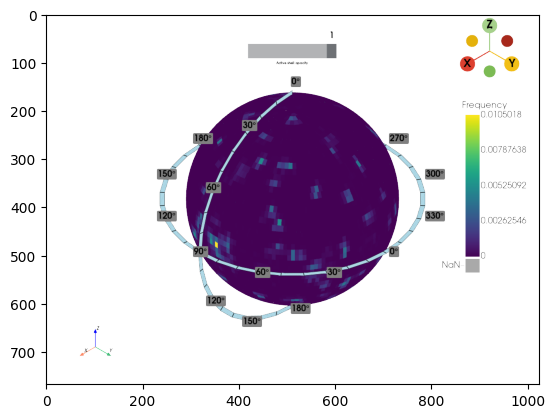

In [17]:
import matplotlib.pyplot as plt
import PIL

im = PIL.Image.open("simulated_fibres.png")

plt.imshow(im)
plt.show()

In [18]:
# Your code here to save PDF

my_plotter.export_graphic("simulated_fibres.pdf", "simulated_fibres")

These functions both have different parameters that can be set. Make sure to check out the documentation to learn more about all the possibilities.

### Exporting Animations

So... a picture is worth a thousand words... about the side of the sphere that is currently visible!

In a screenshot, we can only see one side of the spherical orientation histogram. What if we want to view the sphere from many different angles?

Well... a video is worth a thousand pictures! We can create animations that show the orientation histogram from many different perspectives. The simplest type of video we can create is a *rotation animation*. We do this using the method [`produce_rotating_video`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter.produce_rotating_video).

Make sure to check out the documentation to learn about the various parameters.

The first parameter is the output filename, which must either be a an `mp4` or `gif` file.

In [19]:
# Your code here to create a rotating animation

my_plotter.produce_rotating_video("rotating_sphere.mp4", fps=10, number_of_frames=60)

And now, let's take a look at the video we've produced.

In [20]:
Video("rotating_sphere.mp4", html_attributes="loop autoplay controls")

We can now see the sphere rotating about its axis and examine the results more easily.

## Orientation Filtering

Looking at the orientation histogram, we see a bunch of spots. Thinking back to our data, what do these different spots represent?

Well, our data consist of perfectly straight fibres in different orientations. So, it would stand to reason that the different bright spots correspond to fibres in different orientations.

Wouldn't it be nice if we could manually select these different bright spots and then extract the corresponding vectors?

Let's see how we can do this sort of **orientation filtering** with VectoRose.

### Enabling Cell Picking

The first thing we need to do is enable cell picking. We do this by setting the property [`cell_picking_active`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter.cell_picking_active) to `True` on the `SpherePlotter`.

In [21]:
# Your code here to enable cell picking

my_plotter.cell_picking_active = True

Now, let's go back up to our sphere plotter. If we **right-click** on a face, we see that it becomes outlined in magenta. If we click again, the outline disappears.

By right-clicking, we can select and deselect cells.

> ⚠️ **Warning**\
> Don't forget, you must **right-click** to select cells.


In [22]:
# Note, in this solutions notebook, we'll cheat and programmatically select the cells
import pandas as pd
selected_cells = pd.read_csv("case_study_1_selected_cells.csv")
my_plotter.pick_cells(selected_cells)

### Extracting Vectors from Picked Cells

Choose a patch of faces that you are interested in exploring further. Select the cells by right-clicking. Now, we'll see how to extract the vectors that are only aligned with that orientation.

The cells that we've selected are stored in the [`picked_cells`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.SpherePlotter.cell_picking_active) property of the `SpherePlotter`. Let's look at the cells we've selected.

In [23]:
# Your code here to get the selected cells

selected_cells = my_plotter.picked_cells

selected_cells

,bin,ring,frequency,Data,vtkOriginalCellIds
0,2.0,17.0,0.002165,0.002165,1265.0
1,3.0,17.0,0.001710,0.001710,1266.0
2,3.0,18.0,0.002485,0.002485,1413.0
3,2.0,18.0,0.002271,0.002271,1412.0
4,4.0,17.0,0.000374,0.000374,1267.0
5,4.0,18.0,0.000428,0.000428,1414.0


So, we can see for each cell we've selected what the bin, ring and frequency are. Using our `FineTregenzaSphere`, we can extract the vectors falling in those bins using the method [`get_vectors_from_selected_cells`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/sphere_base/index.html#vectorose.sphere_base.SphereBase.get_vectors_from_selected_cells).

In [24]:
# Your code here to extract the vectors

selected_vectors = my_sphere.get_vectors_from_selected_cells(labelled_vectors, selected_cells)

selected_vectors

,x,y,z,phi,theta,magnitude,shell,ring,bin
4375,0.000387,0.000007,0.000117,58.766588,7.128947,0.839519,0,17,2
4376,0.000382,0.000012,0.000117,56.520019,6.453820,0.816740,0,17,2
4569,0.000387,0.000017,0.000127,58.322349,7.272413,0.850816,0,17,2
4572,0.000387,0.000027,0.000127,58.141725,5.502851,0.788213,0,17,2
4796,0.000392,0.000037,0.000137,57.548939,6.751624,0.817688,0,17,2
...,...,...,...,...,...,...,...,...,...
9022,0.000417,0.000227,0.000252,59.377062,9.907766,0.793165,0,18,4
10962,0.000427,0.000297,0.000292,59.561131,11.195378,0.809060,0,18,4
11572,0.000427,0.000302,0.000302,59.358040,9.641356,0.858831,0,18,4
14630,0.000447,0.000432,0.000377,59.639438,11.495977,0.810854,0,18,4


We can now see that there are much fewer vectors in our selected dataset. We can also use the locations to plot where these vectors lie in our dataset in 3D.

In [25]:
mesh_plotter = pv.Plotter()
mesh_plotter.add_mesh(mesh, opacity=0.5)

vector_locations = selected_vectors[["x", "y", "z"]].to_numpy()
vector_locations_mesh = pv.PointSet(vector_locations)
mesh_plotter.add_mesh(vector_locations_mesh, color="red", render_points_as_spheres=True)
mesh_plotter.show()

Widget(value='<iframe src="http://localhost:57329/index.html?ui=P_0x14efff730_2&reconnect=auto" class="pyvista…

We can now see that most of the vectors we've extracted are contained within a single fibre. So, for clean data, we can easily perform orientation filtering.

## Computing Directional Statistics

So far, we've seen how to visualise collections of vectorial data. Spherical histograms give us a great way to quickly see how our data are distributed. However, sometimes, we want to put numbers on things. Let's start applying some directional statistics to our collection of orientation vectors.

### Preparing Data for Statistical Analysis

Before computing statistics, we need to get our data into the right format. We need to get the vector components in cartesian form. Since we are looking at statistics for pure orientations, we need to consider **unit vectors**. We also need to consider the original, **unduplicated** axes.

We'll create a collection of unit vectors using the function [`vr.util.normalise_vectors`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/util/index.html#vectorose.util.normalise_vectors).

In [26]:
# Your code here to get unit axes
vector_components = vectors[:, 3:]
unit_vectors, _ = vr.util.normalise_vectors(vector_components)

unit_vectors

array([[ 0.97978267, -0.18159547,  0.08395838],
       [-0.83243731, -0.55407144,  0.00727725],
       [ 0.00785035, -0.96934525,  0.24557719],
       ...,
       [ 0.51355999, -0.85086308,  0.11085193],
       [ 0.75050343, -0.66027072,  0.02805684],
       [ 0.83093968, -0.42497731,  0.35907316]], shape=(18711, 3))

### Computing the Mean Resultant Vector

We can compute a few different statistical measurements. Let's start with computing the mean resultant vector. We can do this using the function [`vr.stats.compute_resultant_vector`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/stats/index.html#vectorose.stats.compute_resultant_vector).

In [27]:
# Your code here to compute the mean resultant vector

resultant_vector = vr.stats.compute_resultant_vector(unit_vectors, compute_mean_resultant=True)

resultant_vector_spherical = vr.util.compute_spherical_coordinates(resultant_vector, use_degrees=True)

print(f"Mean resultant vector has magnitude {resultant_vector[-1]}"
      f" and orientation {resultant_vector_spherical[:2]}.")

Mean resultant vector has magnitude 0.3848457016791921 and orientation [  4.47785244 272.36840552].


We can now see that the mean resultant vector has a fairly short length. This makes sense, given the diverse fibre orientations.

The orientation is fairly close to the sphere pole (think about just how close 4.5° is to the pole). This also makes sense. We're considering **orientations**, not directions, so all our vectors are in the upper hemisphere. So, the **Z**-components can't cancel each other out.

### Computing Woodcock's Shape and Strength Parameters

The mean resultant vector gives us a quick way to assess the level of coalignment of the vectors. But if we want a clearer picture of the overall shape of the distribution, we can compute the **orientation matrix** and Woodcock's **shape and strength parameters** based on the orientation matrix eigenvalues.

We can first compute the orientation matrix eigen-decomposition by calling the function [`vr.stats.compute_orientation_matrix_eigs`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/stats/index.html#vectorose.stats.compute_orientation_matrix_eigs). Then, we can compute the shape and strength parameters by calling the function [`compute_orientation_matrix_parameters`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/stats/index.html#vectorose.stats.compute_orientation_matrix_parameters).

Let's see how to do it:

In [28]:
# Your code here to compute Woodcock's shape and strength parameters
eigs, _ = vr.stats.compute_orientation_matrix_eigs(unit_vectors)
params = vr.stats.compute_orientation_matrix_parameters(eigs)

print(f"Strength parameter: {params.strength_parameter}")
print(f"Shape parameter: {params.shape_parameter}")

Strength parameter: 0.6549086394198407
Shape parameter: 1.7445991587671679


The strength parameter is quite low, indicating that the distribution is fairly uniform.

Let's try doing the same thing, but with the vectors we extracted for a single fibre. To convert these to unit vectors, we'll use a different approach. We can convert the filtered vectors `DataFrame` to an array containing unit vectors using the [`convert_vectors_to_cartesian_array`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/sphere_base/index.html#vectorose.sphere_base.SphereBase.convert_vectors_to_cartesian_array) method of our sphere representation.

In [29]:
unit_filtered_vectors = my_sphere.convert_vectors_to_cartesian_array(
    selected_vectors, create_unit_vectors=True
)

eigs, _ = vr.stats.compute_orientation_matrix_eigs(unit_filtered_vectors)
params = vr.stats.compute_orientation_matrix_parameters(eigs)

print(f"Strength parameter: {params.strength_parameter}")
print(f"Shape parameter: {params.shape_parameter}")

Strength parameter: 7.959806060015406
Shape parameter: 23.60253873615821


So, when we look within a narrow window, we get a very strong cluster at a single location.

So... What else can we do with these filtered vectors?

### Estimating VMF Parameters

Well, since we have vectors around a single direction, we could estimate the parameters for a von Mises-Fisher distribution. Recall that this distribution is similar to the Gaussian distribution. We have two parameters:

* $\mu$ - the mean direction
* $\kappa$ - the concentration parameter (higher = more compact cluster)

In VectoRose, we can estimate these parameters using the function [`vr.stats.fit_fisher_vonmises_distribution`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/stats/index.html#vectorose.stats.fit_fisher_vonmises_distribution). Let's do this for our original data and for our filtered data.

In [30]:
# Your code here to compute the VMF parameters for original data
vmf_parameters = vr.stats.fit_fisher_vonmises_distribution(unit_vectors)

print(f"The original dataset has mu={vmf_parameters.mu} and kappa={vmf_parameters.kappa}.")

The original dataset has mu=[-0.07800704  0.00322637  0.99694759] and kappa=1.2788314390139088.


In [31]:
# Your code here to compute the VMF parameters for the filtered data
vmf_parameters_filtered = vr.stats.fit_fisher_vonmises_distribution(unit_filtered_vectors)

print(f"The original dataset has mu={vmf_parameters_filtered.mu} and kappa={vmf_parameters_filtered.kappa}.")

The original dataset has mu=[0.11393334 0.8508583  0.51289311] and kappa=2405.335625397555.


These results shouldn't be very surprising.

Since we have fibres aligned in many different orientations, we get a very low concentration parameter in the first example.

Since we then selected vectors that are very closely aligned with each other, it makes sense that the concentration parameter is much higher.

> ⚠️ **Warning**\
> This was an artificial example just to demonstrate differences in the results. In practice, doing a calculation like this introduces **bias** into your dataset. We knew *a priori* that we would get a high concentration parameter simply by virtue of selecting vectors that are co-aligned in a small neighbourhood. Think very carefully about your statistical workflow and whether fitlering will unnecessarily bias your results.


There are other statistical routines implemented in VectoRose. Make sure to check out the documentation for the [`vr.stats`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/stats/index.html) module, as well as the [Users' Guide](https://vectorose.readthedocs.io/en/latest/users_guide/statistics.html) page on statistics.

## Polar Plotting (Optional)

Up until now, we've been focussing on looking at orientation in 3D. But, sometimes, you may want to look at the orientation a bit differently...

Orientation in 3D can be defined in two different ways:

* Cartesian coordinates: the familiar *x*, *y*, *z* system
* Spherical coordinates: a length (*r*) and two angles ($\phi$, $\theta$)

These two angles represent different aspects of the orientation:

* $\phi$ - the **angle of inclination**, measured downwards from the positive *z*-axis (0°) to the *xy*-plane (90°, for axial data) or the negative *z*-axis (180°, for vectorial data).
* $\theta$ - the **azimuthal angle**, measured in the *xy*-plane as the clockwise angle from the positive *y*-axis (0° and 360°).

While these two angles are used to define orientations in 3D, we can also construct **polar histograms** of each angle separately. In VectoRose, most of the heavy lifting is done by the [`vr.polar_data`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/polar_data/index.html) module.

We'll see how to assign vectors to angular bins and then how to visualise the resulting polar histograms.

### Assigning Polar Histogram Bins

To assign polar histogram bins, we need to create a [`PolarDiscretiser`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/polar_data/index.html#vectorose.polar_data.PolarDiscretiser). Similar to our `FineTregenzaSphere` from earlier, this object is responsible for labelling vectors and computing histograms. Based on the documentation, we need to provide:

* the number of bins we want for the $\phi$ histogram
* the number of bins we want for the $\theta$ histogram
* an indication of whether the data are axial

Let's now create a `PolarDiscretiser` for our simulated fibre data. We'll set there to be 10 bins along the $\phi$ axis and 36 bins along the $\theta$ axis, so that our bins each contain 10 degrees.

> ⚠️ **Attention**\
> For technical reasons, we need an extra bin in the $\phi$ axis to account for any vectors that are perfectly aligned with the last bin edge. Though this may be rare in real-world data, it can occur in simulated vectors.


In [32]:
# Your code here to construct a polar discretiser

polar_discretiser = vr.polar_data.PolarDiscretiser(10, 36, True)

Now, like with our Tregenza sphere earlier, we can use the method [`assign_histogram_bins`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/polar_data/index.html#vectorose.polar_data.PolarDiscretiser.assign_histogram_bins). Unlike when working with the 3D spherical plots, we will work with the **unduplicated axes**.

In [33]:
# Your code here to assign bins to the vectors

labelled_polar_vectors = polar_discretiser.assign_histogram_bins(vectors)

labelled_polar_vectors

,x,y,z,vx,vy,vz,phi,theta,magnitude,phi_bin,theta_bin
0,0.000217,0.000007,0.000002,0.673993,-0.124920,0.057755,85.183870,100.500197,0.687901,8,10
1,0.000217,0.000012,0.000002,-0.759396,-0.505455,0.006639,89.583041,236.352208,0.912256,8,23
2,0.000222,0.000012,0.000002,0.003936,-0.486057,0.123139,75.784054,179.535994,0.501428,7,17
3,0.000227,0.000012,0.000002,-0.683302,-0.449688,0.253314,72.793514,236.650681,0.856323,7,23
4,0.000227,0.000017,0.000002,-0.607527,-0.519356,0.187796,76.777555,229.473854,0.821028,7,22
...,...,...,...,...,...,...,...,...,...,...,...
18706,0.000167,0.000487,0.000497,0.614173,-0.327743,0.038292,86.851604,118.085863,0.697202,8,11
18707,0.000172,0.000487,0.000497,-0.044359,-0.658515,0.049565,85.705285,183.853788,0.661866,8,18
18708,0.000162,0.000492,0.000497,0.381766,-0.632508,0.082404,83.635572,148.885854,0.743372,8,14
18709,0.000167,0.000492,0.000497,0.529864,-0.466158,0.019808,88.392251,131.340363,0.706011,8,13


Like before, we now have a `DataFrame` containing the vectors and their associated bins.

### Computing Polar Histograms

We can now gather the bin information and construct $\phi$ and $\theta$ histograms using the `PolarDiscretiser` methods [`construct_phi_histogram`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/polar_data/index.html#vectorose.polar_data.PolarDiscretiser.construct_phi_histogram) and [`construct_theta_histogram`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/polar_data/index.html#vectorose.polar_data.PolarDiscretiser.construct_theta_histogram).

In [34]:
# Your code here to construct the phi histogram

phi_histogram = polar_discretiser.construct_phi_histogram(labelled_polar_vectors)

phi_histogram

,start,end,count,frequency
0,0.0,10.0,350,0.018706
1,10.0,20.0,125,0.006681
2,20.0,30.0,905,0.048367
3,30.0,40.0,1530,0.081770
4,40.0,50.0,1508,0.080594
5,50.0,60.0,2614,0.139704
6,60.0,70.0,2680,0.143231
7,70.0,80.0,1843,0.098498
8,80.0,90.0,6973,0.372668
9,90.0,100.0,183,0.009780


In [35]:
# Your code here to construct the theta histogram

theta_histogram = polar_discretiser.construct_theta_histogram(labelled_polar_vectors)

theta_histogram

,start,end,count,frequency
0,0.0,10.0,573,0.030624
1,10.0,20.0,390,0.020843
2,20.0,30.0,371,0.019828
3,30.0,40.0,266,0.014216
4,40.0,50.0,781,0.041740
5,50.0,60.0,1415,0.075624
6,60.0,70.0,156,0.008337
7,70.0,80.0,472,0.025226
8,80.0,90.0,930,0.049703
9,90.0,100.0,973,0.052001


So, we can now see how many vectors fall into each polar bin, as both counts and frequencies.

But... this isn't **yet** a plot...

### Visualising Polar Histograms

The final step here is to create visual polar plots of the histogram data. While we could manually do this with Matplotlib, VectoRose provides some helpful functions to make the process easier.

We can easily create a single figure with both the $\phi$ and $\theta$ histograms using the function [`vr.plotting.produce_phi_theta_polar_histogram_plots`](https://vectorose.readthedocs.io/en/latest/autoapi/vectorose/plotting/index.html#vectorose.plotting.produce_phi_theta_polar_histogram_plots).

While this function has lots of different parameters, the most important ones for us are the first two: the $\phi$ histogram data and the $\theta$ histogram data.

Another helpful parameter is `use_counts`, where we can set whether we want the histogram to show counts or fractions.

Let's use this function to visualise our polar histograms.

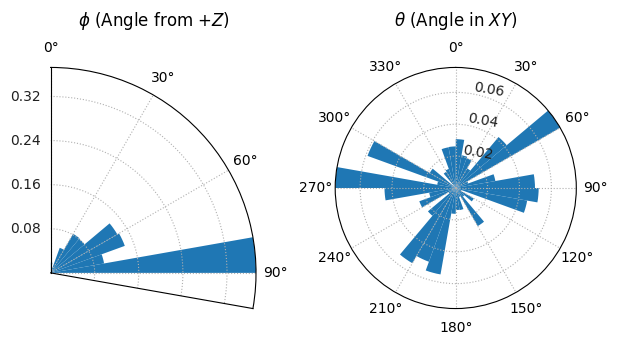

In [36]:
# Your code here to visualise the polar histograms

fig = vr.plotting.produce_phi_theta_polar_histogram_plots(
    phi_histogram, theta_histogram, use_counts=False
)

Looking at these plots, we can see that many of the vectors in our simulated fibres are inclined to near the *xy*-plane, and have a variety of different headings.

## Conclusion

In this notebook, we've seen the basics of using VectoRose to analyse vectors computed based on a simulated fibre system. Here's a summary of what we've covered:

* We can use VectoRose to construct **spherical orientation histograms**.
* We can easily capture **screenshots** and **animations** of these 3D plots.
* We can **interactively** select specific sphere faces to **filter vectors by orientation**.
* We can compute **directional statistics** to gain additional quantitative insights into the data.
* We can construct **polar plots** to get a broader overview of the orientations present in the data.

At this point, we've covered many of the basics of VectoRose... but there's an important idea that we haven't seen yet.

What if your vectors have a non-unit length, and you want to look at more than just the orientation/direction?

The answer is coming up... in the next notebook!

## Extra Practice

Want extra practice using VectoRose? Here's another simulated fibre system, along with its orientation field. The orientation field can be found in [`../assets/CaseStudy1/RandomCylinders3_R5_S5_SMOOTH1_EIG_MASKED.npy`](../assets/CaseStudy1/RandomCylinders3_R5_S5_SMOOTH1_EIG_MASKED.npy) and the mesh is found in [`../assets/CaseStudy1/RandomCylinders3.ply`](../assets/CaseStudy1/RandomCylinders3.ply). Try to redo the steps that we did, but with different data. Look at the orientation patterns. Were these fibres generated in a similar or different way from the ones we considered in this notebook?

In [37]:
Video("../assets/CaseStudy1/RandomCylinders3.mp4", width=720)

In [38]:
# Your analysis code here
